# iRobot Data Scientist Interview Challenge
## By Louis Penafiel

### Data preparation 
We have two datasets, mission_data.csv and geo_data.csv. Before answering the questions, it is important to understand the datasets we have first, so we'll be performing quick explorations on both of the datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Mission_data EDA

In [4]:
mission_data = pd.read_csv("data/mission_data.csv")
print(mission_data.head())
print(mission_data.describe())

            robotid             datetime  nmssn  runm  chrgm  pausem outcome
0  000NG2FMLJBT9ANZ  2017-10-01 16:17:22     40     3      1       2   stuck
1  000NG2FMLJBT9ANZ  2017-10-03 14:25:56     41    83      0      13      ok
2  000NG2FMLJBT9ANZ  2017-10-04 12:32:51     42    66     13      12      ok
3  000NG2FMLJBT9ANZ  2017-10-26 02:12:55     45    72     24       0    cncl
4  000NG2FMLJBT9ANZ  2017-10-27 07:17:39     46    61      9       0    cncl
               nmssn           runm          chrgm         pausem
count  367679.000000  367679.000000  367679.000000  367679.000000
mean       73.258984      48.906383       5.152772       6.231351
std        35.749076      29.819507       8.364238       8.202553
min         1.000000       0.000000       0.000000       0.000000
25%        47.000000      27.000000       0.000000       0.000000
50%        71.000000      47.000000       0.000000       1.000000
75%        95.000000      70.000000      11.000000      12.000000
max       

In [5]:
# How many null values per column
mission_data.isna().sum()

robotid     0
datetime    0
nmssn       0
runm        0
chrgm       0
pausem      0
outcome     0
dtype: int64

In [6]:
# Data type of columns
# pandas.DataFrame.dtypes only gives object
for column in mission_data.columns:
    print(f'Type of {column}: {type(mission_data[column].iloc[0])}')

Type of robotid: <class 'str'>
Type of datetime: <class 'str'>
Type of nmssn: <class 'numpy.int64'>
Type of runm: <class 'numpy.int64'>
Type of chrgm: <class 'numpy.int64'>
Type of pausem: <class 'numpy.int64'>
Type of outcome: <class 'str'>


In [7]:
# How many unique robots are there
len(mission_data.robotid.unique())

9826

#### geo_data EDA

In [8]:
geo_data = pd.read_csv("data/geo_data.csv")
print(geo_data.head())
print(geo_data.describe())

  country_cd          timezone           robotid
0         SE  Europe/Stockholm  T29NF13ZIYISNF79
1         JP        Asia/Tokyo  9S12V26O6G426OYR
2         IL    Asia/Jerusalem  QI6X3P9JKNILKKU1
3         IL    Asia/Jerusalem  7OMKNWMWA4XWC911
4         IL    Asia/Jerusalem  YO63CL0ZFK83SYCZ
       country_cd        timezone           robotid
count        9998           10000             10000
unique         84             122             10000
top            IL  Asia/Jerusalem  KCTNJ62R1M83GBH9
freq         6065            6108                 1


In [9]:
# Check if all unique mission_data IDs are in geo_data
set(mission_data.robotid.unique()).issubset(geo_data.robotid)

True

In [10]:
# How many null values per columnm
geo_data.isna().sum()

country_cd    2
timezone      0
robotid       0
dtype: int64

Since there are 2 null values for `country_cd` we want to check if those `robotid` in `mission_data.csv` also contains these null values

In [11]:
geo_data_subset = geo_data.loc[geo_data['robotid'].isin(mission_data.robotid.unique())]
print(geo_data_subset.describe())
print(geo_data_subset.isna().sum())

       country_cd        timezone           robotid
count        9824            9826              9826
unique         84             121              9826
top            IL  Asia/Jerusalem  KCTNJ62R1M83GBH9
freq         5956            5998                 1
country_cd    2
timezone      0
robotid       0
dtype: int64


In [16]:
geo_data_subset[geo_data_subset['country_cd'].isnull()]

,country_cd,timezone,robotid
6091,NaN,Europe/Vaduz,QMJXZLREE88GULA1
6363,NaN,Africa/Windhoek,Z9JJM7JRIGJYLER2


From this, the `robotid` of these ones have null `country_cd`. If we are to perform analytics on these by geography, how much `mission_data` do we have from these robot users.

In [12]:
geo_data_null = geo_data_subset[geo_data_subset['country_cd'].isnull()]
for robotid_null in geo_data_null.robotid:
    print("Mission data of robotid: {0}".format(robotid_null))
    print(mission_data[mission_data.robotid == robotid_null].describe())

Mission data of robotid: QMJXZLREE88GULA1
            nmssn        runm      chrgm     pausem
count   47.000000   47.000000  47.000000  47.000000
mean    96.340426   51.468085   2.170213   4.340426
std     16.176038   31.825510   5.928264   6.346093
min     69.000000    0.000000   0.000000   0.000000
25%     82.500000   26.000000   0.000000   0.000000
50%     98.000000   57.000000   0.000000   0.000000
75%    109.500000   74.000000   0.000000   7.500000
max    123.000000  115.000000  22.000000  20.000000
Mission data of robotid: Z9JJM7JRIGJYLER2
           nmssn        runm      chrgm    pausem
count  25.000000   25.000000  25.000000  25.00000
mean   83.240000   48.920000   1.520000   3.00000
std     9.426381   34.910505   3.874274   5.08265
min    68.000000    3.000000   0.000000   0.00000
25%    75.000000   25.000000   0.000000   0.00000
50%    82.000000   46.000000   0.000000   0.00000
75%    92.000000   82.000000   0.000000   4.00000
max    98.000000  115.000000  13.000000  18.0000

In [14]:
# Check the timezones to see what percentage from these timezones are of the robots
# Need to get the robotids inside those timezones
# Alternative could be to add that information into the mission_data dataframe
# But may take up more memory depending on how many rows of data we have

for timezone_null in geo_data_null.timezone:
    print(f"Mission data of timezone: {timezone_null}")
    geo_data_timezone = geo_data_subset[geo_data_subset.timezone == timezone_null]
    robotid_timezone = geo_data_timezone.robotid.unique()
    mission_data_timezone = mission_data[mission_data.robotid.isin(robotid_timezone)]
    print(mission_data_timezone.describe())

Mission data of timezone: Europe/Vaduz
            nmssn        runm      chrgm     pausem
count   80.000000   80.000000  80.000000  80.000000
mean    91.075000   50.525000   1.675000   4.175000
std     15.356337   32.991742   5.184629   6.310078
min     67.000000    0.000000   0.000000   0.000000
25%     78.750000   20.000000   0.000000   0.000000
50%     89.500000   50.000000   0.000000   0.000000
75%    101.250000   75.750000   0.000000   7.000000
max    123.000000  116.000000  22.000000  20.000000
Mission data of timezone: Africa/Windhoek
           nmssn        runm      chrgm    pausem
count  25.000000   25.000000  25.000000  25.00000
mean   83.240000   48.920000   1.520000   3.00000
std     9.426381   34.910505   3.874274   5.08265
min    68.000000    3.000000   0.000000   0.00000
25%    75.000000   25.000000   0.000000   0.00000
50%    82.000000   46.000000   0.000000   0.00000
75%    92.000000   82.000000   0.000000   4.00000
max    98.000000  115.000000  13.000000  18.00000


In [15]:
# Check which robotids have that Europe/Vaduz timezone
# Want to make sure before inferring that this is Liechtenstein
geo_data_timezone = geo_data_subset[geo_data_subset.timezone=='Europe/Vaduz']
print(geo_data_timezone.head())

     country_cd      timezone           robotid
6091        NaN  Europe/Vaduz  QMJXZLREE88GULA1
9657         NO  Europe/Vaduz  JCU2B100T9CTZT7L


#### Data imputation
Vaduz is the capital of Liechtenstein.

Windhoek is the capital of Namibia.

As these robot users make up 100% and 50% of a given timezone, if we want to perform a wholistic analysis, it is not recommended to ignore them. As that robot is the only one in our dataset to be in that timezone, we can set the country code to be NA for Namibia. For the NaN value in the 'Europe/Vaduz' timezone, there's many countries in the European area with the timezone. Because there are only two robots in the 'Europe/Vaduz' timezone, we will impute the NaN country code with that of the robot that isn't NaN. This country code is 'NO' meaning Norway.

In [17]:
geo_data_subset.at[6091, 'country_cd'] = 'NO'
geo_data_subset.at[6363, 'country_cd'] = 'NA'
# Now how many null values are there
geo_data_subset.isna().sum()

country_cd    0
timezone      0
robotid       0
dtype: int64

### 1. Are there geographic differences in robot usage?

In [18]:
geo_data_subset.describe()

,country_cd,timezone,robotid
count,9826,9826,9826
unique,85,121,9826
top,IL,Asia/Jerusalem,KCTNJ62R1M83GBH9
freq,5956,5998,1


There are currently 85 unique country codes. We are interested in the use patterns of a typical robot user per country, so we will do just that. But to make any design decisions, for now we will focus on countries with at least 100 robot users. This will give us enough statistics to make valid suggestions for design decisions. For any country that does not have 100 robot users, a business decision would be to improve market presence and increase growth in those countries/regions, and make design decisions based on market research in those places. Furthermore, the analyses done on countries with at least 100 robot users can be redone for the other countries, if necessary.

In [20]:
robot_users = geo_data_subset.country_cd.value_counts()
countries = list(robot_users[robot_users>100].index)
print(len(countries))
print(countries)

14
['IL', 'CN', 'FR', 'JP', 'AT', 'CA', 'US', 'DE', 'BE', 'PL', 'IT', 'TW', 'NO', 'RU']


This leads to 14 countries that we will investigate. ['IL', 'CN', 'FR', 'JP', 'AT', 'CA', 'US', 'DE', 'BE', 'PL', 'IT', 'TW','NO', 'RU']

#### Aggregate user statistics

From the given variables in `mission_data`, we need to aggregate the statistics for a given user (`robotid`). The following aggregated information will be plotted for the 14 countries of interest:
- Number of missions per week: This will give us information about battery health as the number of missions per week is proportional to the number of charging cycles
- Maximum number of missions: This will also give us information about battery health.
- Mean and median `runm`: This will give insights on how large the areas that the robot usually needs cleaning
- Mean and median `chrgm`: This will give information about how often a robot has to recharge during missions
- Mean and median `pausem`: This will give information about user behavior because users have to manually pause the robot. This could be because of factors such as noise or obstruction.
- Outcome percentages, i.e. what percentage of the total number of outcomes are 'Cncl', 'Stuck', 'Ok', or 'Bat': This tells us information about user preferences (i.e. how often does the user cancel a mission), the environment (i.e. how often does the robot get stuck on obstacles), and the battery (i.e. how often does the robot's battery get too low to return to dock).

We look at both mean and median for what I'm calling MinuteFeatures because of the outliers and high standard deviations for these columns

To get the information of number of missions per week, we use the package `datetime` to create `datetime` objects of the information from the `mission_data` `datetime` column.

In [21]:
import datetime as dt

In [22]:
mission_data['datetime_obj'] = mission_data['datetime'].apply(lambda datetime: dt.datetime.fromisoformat(datetime))

We then perform a `df.groupby` and group on `robotid` per country to aggregate the user statistics. I'd need to define some functions that allows us to get these user information.

In [26]:
def calcMissionsPerWeek(group):
    """
    Calculates the number of missions per week given a group from a df.groupby on mission_data
    """
    missionsRange = max(group['nmssn']) - min(group['nmssn'])
    datetimeRange = max(group['datetime_obj']) - min(group['datetime_obj'])
    daysRange = datetimeRange.days
    # If missions only happen within the period of 1 day, this would make daysRange 0. Change to 1
    if daysRange == 0:
        daysRange = 1
    missionsPerWeek = (missionsRange / daysRange) * 7
    return missionsPerWeek

def aggregateValues(group):
    """
    Aggregates values of mission data given a group from a df.groupby('robotid') on mission_data
    """
    user = {}
    user['missionsPerWeek'] = calcMissionsPerWeek(group)
    user['missionsTotal'] = group['nmssn'].max()
    for minuteFeature in ['runm','chrgm','pausem']:
        user[f'{minuteFeature}Mean'] = group[minuteFeature].mean()
        user[f'{minuteFeature}Median'] = group[minuteFeature].median()
    for outcome in mission_data.outcome.unique():
        userOutcomes = group['outcome'] == outcome
        user[f'{outcome}Total'] = userOutcomes.sum()
        user[f'{outcome}Percentage'] = user[f'{outcome}Total'] / len(group)
        
    return pd.Series(user, index=user.keys())

In [27]:
userAggregatedData = {}
for country in countries:
    print(f"Aggregating mission data of country: {country}")
    geo_data_country = geo_data_subset[geo_data_subset.country_cd == country]
    robotid_country = geo_data_country.robotid.unique()
    mission_data_country = mission_data[mission_data.robotid.isin(robotid_country)]
    userAggregatedData[country] = mission_data_country.groupby('robotid').apply(lambda group: aggregateValues(group))

Aggregating mission data of country: IL
Aggregating mission data of country: CN
Aggregating mission data of country: FR
Aggregating mission data of country: JP
Aggregating mission data of country: AT
Aggregating mission data of country: CA
Aggregating mission data of country: US
Aggregating mission data of country: DE
Aggregating mission data of country: BE
Aggregating mission data of country: PL
Aggregating mission data of country: IT
Aggregating mission data of country: TW
Aggregating mission data of country: NO
Aggregating mission data of country: RU


In [28]:
# Example user aggregated values
print(userAggregatedData['RU'].head())

                  missionsPerWeek  missionsTotal   runmMean  runmMedian  \
robotid                                                                   
03UTT38MA97P1CK8         0.840000           35.0  50.555556        56.0   
0RZC9KG0M1MC9NPZ         0.700000           65.0  77.000000        77.0   
19NJROUY3GVSUSI7         3.056338          144.0  51.911392        55.0   
1FRTW2LADQBR4KA2         1.645614          137.0  51.254237        51.0   
1RTOHAU34XD1J0V1         5.970588          155.0  41.802632        38.0   

                  chrgmMean  chrgmMedian  pausemMean  pausemMedian  \
robotid                                                              
03UTT38MA97P1CK8   0.333333          0.0    5.222222           0.0   
0RZC9KG0M1MC9NPZ   0.000000          0.0   17.000000          17.0   
19NJROUY3GVSUSI7   1.481013          0.0    5.759494           1.0   
1FRTW2LADQBR4KA2   1.932203          0.0    5.203390           0.0   
1RTOHAU34XD1J0V1   1.697368          0.0    4.618421  

#### Plots
To understand geographic differences based on these aggregated user statistics, we use box plots for our visualization for each of the features aggregated. The reason for box plots, instead of the mean and standard deviation is because of the large variance and number of outliers for all of these variables. Note all the plots will be of information per user per country.

##### missions per week


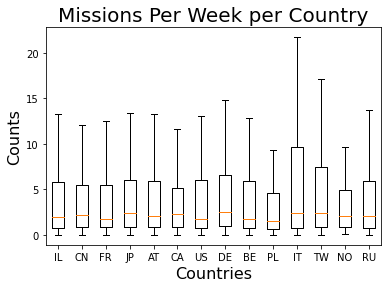

In [29]:
fig, ax = plt.subplots()
boxplot_dict = ax.boxplot([userAggregatedData[country]['missionsPerWeek'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
plt.title('Missions Per Week per Country', fontsize = 20)
plt.xlabel('Countries', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.show()

From the plot, the number of missions per week are around the same in terms of the median (orange line). However, note that countries, 'IT' and 'TW' have a significantly larger 75th percentile compared to the others, meaning that their charging cycles will be higher, leading to a faster deterioration of battery health.

##### Maximum number of missions


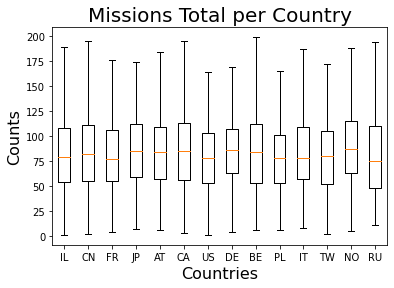

In [30]:
fig, ax = plt.subplots()
boxplot_dict = ax.boxplot([userAggregatedData[country]['missionsTotal'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
plt.title('Missions Total per Country', fontsize = 20)
plt.xlabel('Countries', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.show()

From the box plot above, there are no significant differences per country.

#####  Mean and Median of runm

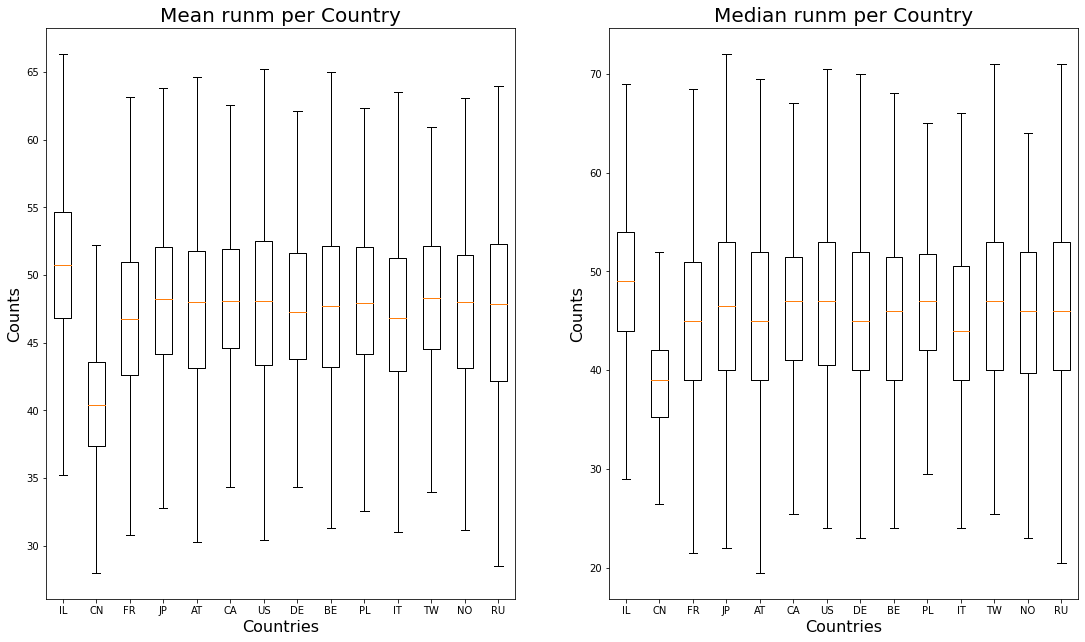

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
boxplot_dict1 = ax1.boxplot([userAggregatedData[country]['runmMean'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
boxplot_dict2 = ax2.boxplot([userAggregatedData[country]['runmMedian'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
ax1.set_title('Mean runm per Country', fontsize = 20)
ax2.set_title('Median runm per Country', fontsize = 20)
ax1.set_xlabel('Countries', fontsize = 16)
ax2.set_xlabel('Countries', fontsize = 16)
ax1.set_ylabel('Counts', fontsize = 16)
ax2.set_ylabel('Counts', fontsize = 16)
plt.show()

The main geographical difference occurs in 'CN' meaning that usually the robots in this country have quicker missions, allowing us to reduce battery life or increase power usage in this country.

#####  Mean and Median of chrgm

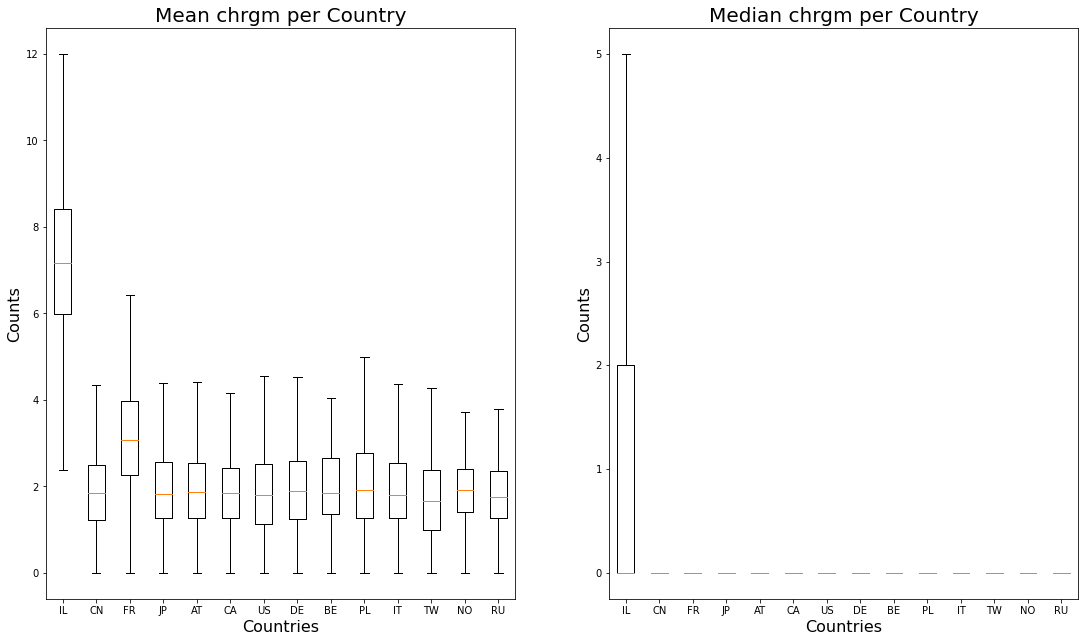

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
boxplot_dict1 = ax1.boxplot([userAggregatedData[country]['chrgmMean'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
boxplot_dict2 = ax2.boxplot([userAggregatedData[country]['chrgmMedian'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
ax1.set_title('Mean chrgm per Country', fontsize = 20)
ax2.set_title('Median chrgm per Country', fontsize = 20)
ax1.set_xlabel('Countries', fontsize = 16)
ax2.set_xlabel('Countries', fontsize = 16)
ax1.set_ylabel('Counts', fontsize = 16)
ax2.set_ylabel('Counts', fontsize = 16)
plt.show()

Note the median graph is mainly because the median value of each robot user's missions' `chrgm` is 0 minutes. This could be because of very large outliers that lead to the mean being significantly higher than 0, as shown in the mean plot. So we will base these decisions from the mean plot. Countries 'IL' and 'FR' have a larger amount of the mission times requiring to be charging. This can mean that we need to improve battery life in these regions, so that the robots can run for longer periods of time without needing to be charged.

#####  Mean and Median of pausem


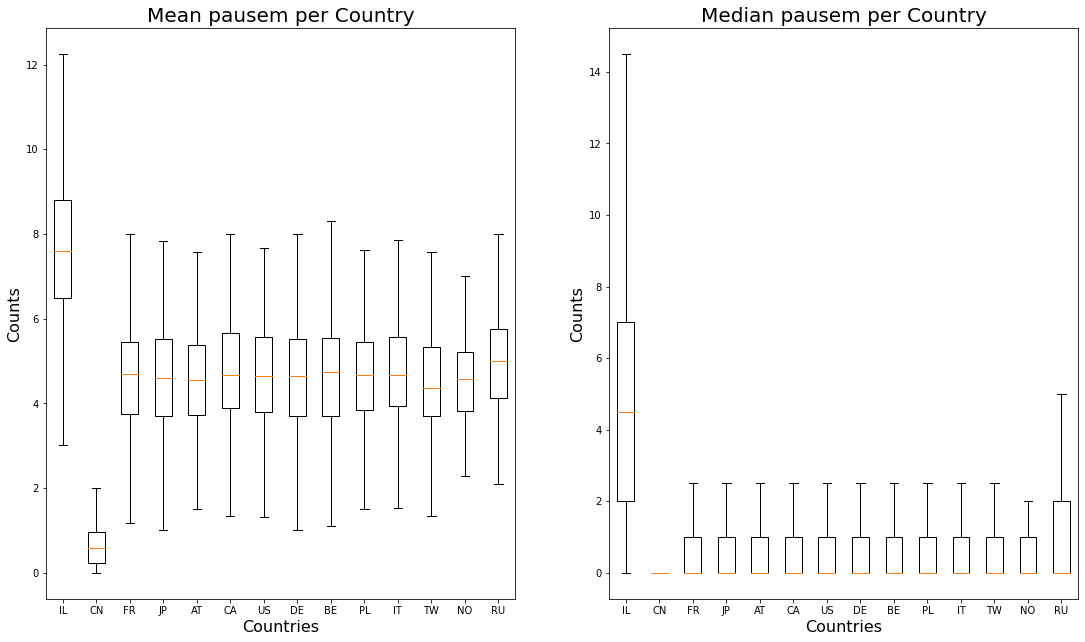

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
boxplot_dict1 = ax1.boxplot([userAggregatedData[country]['pausemMean'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
boxplot_dict2 = ax2.boxplot([userAggregatedData[country]['pausemMedian'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
ax1.set_title('Mean pausem per Country', fontsize = 20)
ax2.set_title('Median pausem per Country', fontsize = 20)
ax1.set_xlabel('Countries', fontsize = 16)
ax2.set_xlabel('Countries', fontsize = 16)
ax1.set_ylabel('Counts', fontsize = 16)
ax2.set_ylabel('Counts', fontsize = 16)
plt.show()

Since we're interested in user preferences, we need to looks at the median plot, as it tells us usually whether the user manually pauses the robot. As the medians for all users for other countries, except for 'IL' are 0, this means that users usually don't pause a robot's mission. Since, users in 'IL' have a median between 4 and 5 minutes paused, that means we need to understand why users in this region are pausing the missions

From the mean plot, the main geographic difference comes in the countries 'CN', which is significantly below the other countries', and 'IL' which is above most of the other countries. 

##### Outcomes


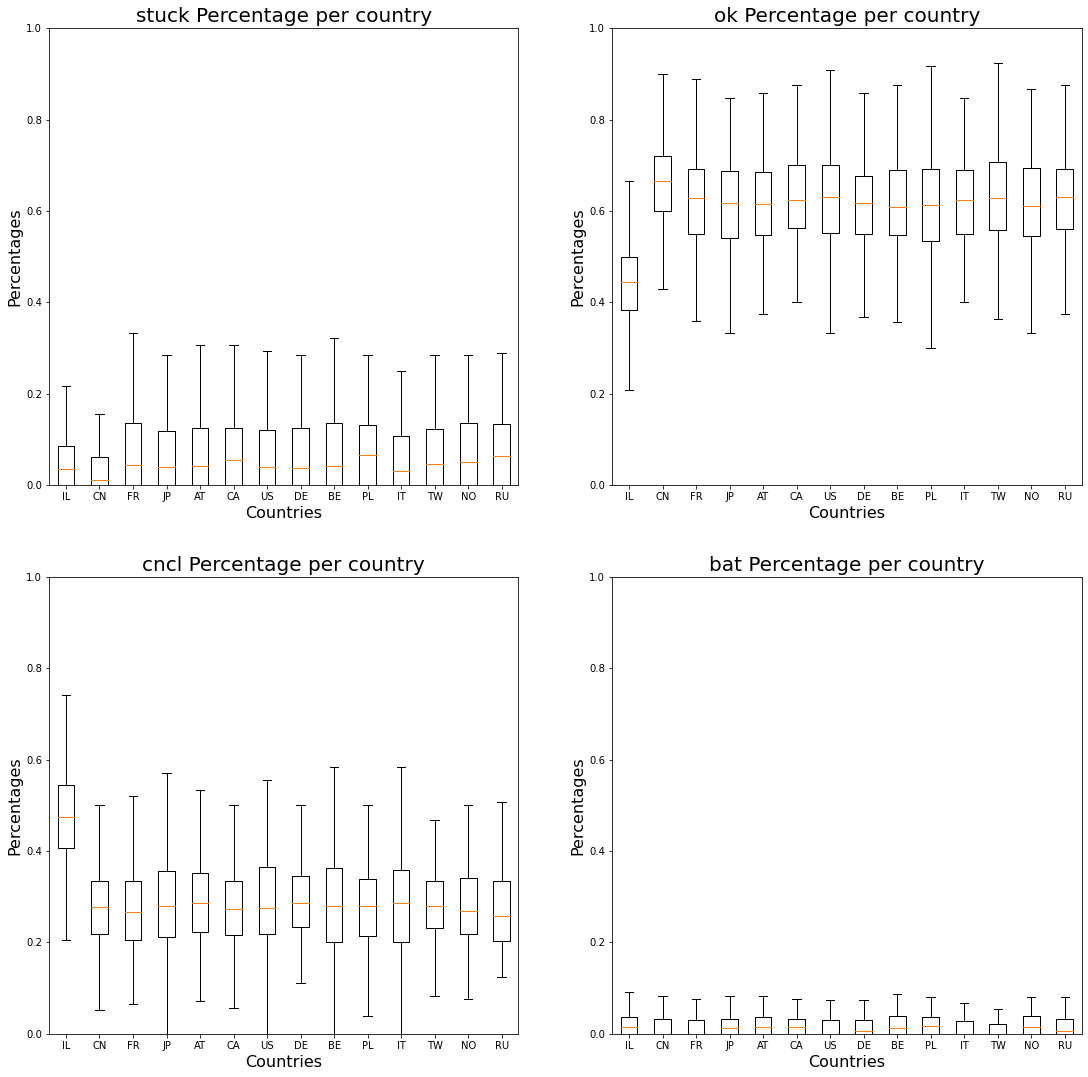

In [138]:
fig = plt.figure()
fig.set_size_inches(18.5, 18.5)
outcomes = mission_data.outcome.unique()
for i in range(len(outcomes)):
    outcome = outcomes[i]
    plt.subplot(2, 2, i + 1)
    plt.boxplot([userAggregatedData[country][f'{outcome}Percentage'] for country in countries],
                labels = countries,
                showfliers = False
               )
    plt.title(f'{outcome} Percentage per country', fontsize = 20)
    plt.xlabel('Countries', fontsize = 16)
    plt.ylabel('Percentages', fontsize = 16)
    plt.ylim(0,1)
plt.show()

From these numbers the main difference comes in the 'IL' country. This country has the highest percentage of user cancelled missions. This could be because users are not satisfied with the robot's performance or noise.

#### Summary
Countries, 'IT' and 'TW' have a significantly larger 75th percentile for the missions per week variable, compared to the others, meaning that their charging cycles will be higher, leading to a faster deterioration of battery health.

There are no significant differences between countries on the maximum number of missions.

MinuteFeatures: The main geographical difference in `runm` occurs in 'CN' meaning that usually the robots in this country have quicker missions, allowing us to reduce battery life or increase power usage in this country. Countries 'IL' and 'FR' have a larger amount of the mission times requiring to be charging (`chrgm`). This can mean that we need to improve battery life in these regions, so that the robots can run for longer periods of time without needing to be charged. As the medians for all users for other countries, except for 'IL', for the `pausem` variable are 0, this means that users usually don't pause a robot's mission. Since, users in 'IL' have a median between 4 and 5 minutes paused, that means we need to understand why users in this region are pausing the missions.

Outcomes: 'IL' has the highest percentage of user cancelled missions. This could be because users are not satisfied with the robot's performance or noise.

### 2. Data Loss
Mission data loss is inside the data. We have a max number of missions and a minimum (1). We can use the number of records to quantify how many mission data we don't have.

As we've already aggregated the user information from the countries that have at least 100 registered users.

In [48]:
def calcNumRecordsLost(group):
    """
    Calculates the number of lost mission data by taking the difference between max number of mission 
    and number of records per user
    """
    user = {}
    user['missionsTotal'] = group['nmssn'].max()
    user['recordsLostTotal'] = user['missionsTotal'] - len(group)
    user['recordsLostPercentage'] = user['recordsLostTotal'] / user['missionsTotal']
    
    return pd.Series(user, index=user.keys())

In [51]:
userLossData = {} 
for country in countries:
    print(f"Aggregating loss data of country: {country}")
    geo_data_country = geo_data_subset[geo_data_subset.country_cd == country]
    robotid_country = geo_data_country.robotid.unique()
    mission_data_country = mission_data[mission_data.robotid.isin(robotid_country)]
    userLossData[country] = mission_data_country.groupby('robotid').apply(lambda group: calcNumRecordsLost(group))

Aggregating loss data of country: IL
Aggregating loss data of country: CN
Aggregating loss data of country: FR
Aggregating loss data of country: JP
Aggregating loss data of country: AT
Aggregating loss data of country: CA
Aggregating loss data of country: US
Aggregating loss data of country: DE
Aggregating loss data of country: BE
Aggregating loss data of country: PL
Aggregating loss data of country: IT
Aggregating loss data of country: TW
Aggregating loss data of country: NO
Aggregating loss data of country: RU


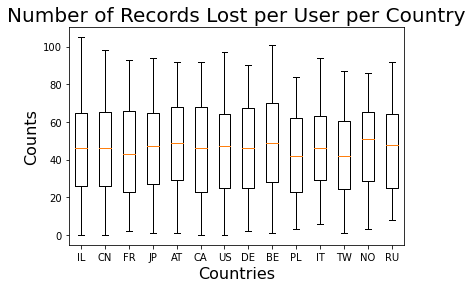

In [53]:
fig, ax = plt.subplots()
boxplot_dict = ax.boxplot([userLossData[country]['recordsLostTotal'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
plt.title('Number of Records Lost per Country', fontsize = 20)
plt.xlabel('Countries', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.show()

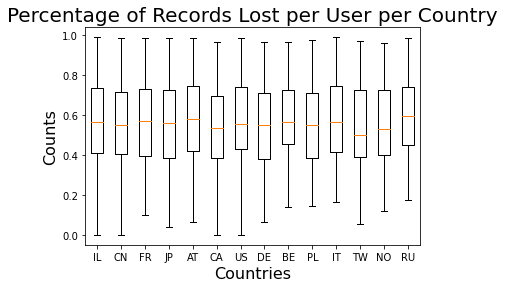

In [55]:
fig, ax = plt.subplots()
boxplot_dict = ax.boxplot([userLossData[country]['recordsLostPercentage'] for country in countries],
                          labels = countries,
                          showfliers = False
                         )
plt.title('Percentage of Records Lost per Country', fontsize = 20)
plt.xlabel('Countries', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.show()

From this graph, it looks as if around ~60% of the mission data has been lost for all of these countries. This looks to be a uniform loss, but we'd like to understand if this is from some catastrophic event or random mission loss for individual robots. We plot a histogram based on datetime, grouped by month.

In [115]:
def calcNumRecordsLostByMonth(group):
    """
    Calculates the number of lost mission data by taking the difference between max number of mission 
    and number of records per user by the (year, month)
    """
    month = {}
    month['missionsTotal'] = 0
    for user in group.robotid.unique():
        userMissionMax = group[group.robotid == user]['nmssn'].max()
        userMissionMin = group[group.robotid == user]['nmssn'].min()
        # + 1 is for inclusivity. We're taking a range, but it's inclusive.
        month['missionsTotal'] += (userMissionMax - userMissionMin) + 1
    month['recordsLostTotal'] = month['missionsTotal'] - len(group)
    
    # Zero division error check
    if month['missionsTotal'] == 0:
        month['missionsTotal'] = 1
    month['recordsLostPercentage'] = month['recordsLostTotal'] / month['missionsTotal']
    
    return pd.Series(month, index=month.keys())

In [118]:
userLossDataByMonth = {}
for country in countries:
    geo_data_country = geo_data_subset[geo_data_subset.country_cd == country]
    robotid_country = geo_data_country.robotid.unique()
    mission_data_country = mission_data[mission_data.robotid.isin(robotid_country)]
    userLossDataByMonth[country] = mission_data_country.groupby([(mission_data_country['datetime_obj'].dt.year),(mission_data_country['datetime_obj'].dt.month)]).apply(lambda group: calcNumRecordsLostByMonth(group))



In [136]:
# Example of user data loss by month
userLossDataByMonth['JP']

missionsTotal  recordsLostTotal  \
datetime_obj datetime_obj                                    
2016         1                      42.0               8.0   
             2                      43.0               4.0   
             3                     169.0              20.0   
             4                     295.0              30.0   
             5                     275.0              39.0   
             6                     301.0              32.0   
             7                     369.0              38.0   
             8                     443.0              52.0   
             9                     538.0              57.0   
             10                    382.0              37.0   
             11                    455.0              55.0   
             12                    618.0              77.0   
2017         1                     584.0              75.0   
             2                     543.0              72.0   
             3                     681.0              80.0   
             4                     768.0             104.0   
             5                     896.0             109.0   
             6                     874.0              82.0   
             7                     915.0             125.0   
             8                     913.0             108.0   
             9                     795.0              92.0   
             10                    813.0             104.0   
             11                    613.0              92.0   
             12                   1028.0             118.0   

                           recordsLostPercentage  
datetime_obj datetime_obj                         
2016         1                          0.190476  
             2                          0.093023  
             3                          0.118343  
             4                          0.101695  
             5                          0.141818  
             6                          0.106312  
             7                          0.102981  
             8                          0.117381  
             9                          0.105948  
             10                         0.096859  
             11                         0.120879  
             12                         0.124595  
2017         1                          0.128425  
             2                          0.132597  
             3                          0.117474  
             4                          0.135417  
             5                          0.121652  
             6                          0.093822  
             7                          0.136612  
             8                          0.118291  
             9                          0.115723  
             10                         0.127921  
             11                         0.150082  
             12                         0.114786

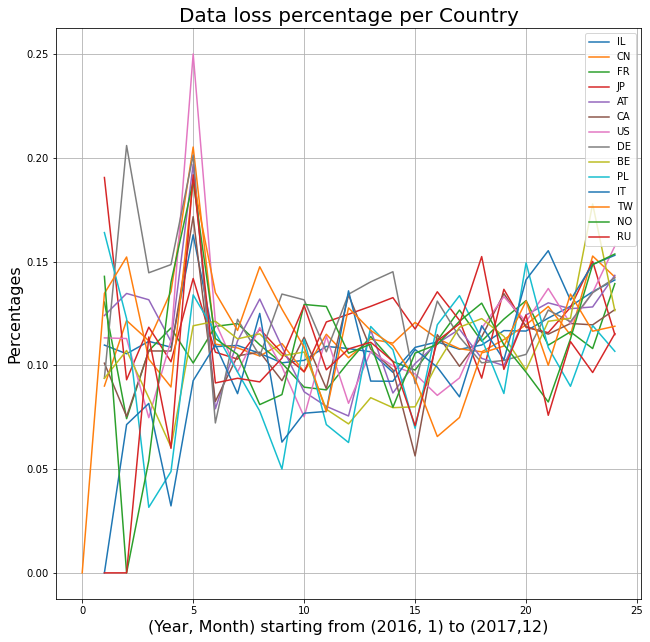

In [165]:
fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
for country in countries:
    # Some data includes (2015, 12), need to offset the other datasets by 1
    if len(userLossDataByMonth[country]) == 24:
        xPos = np.arange(len(userLossDataByMonth[country])) + 1
    else:
        xPos = np.arange(len(userLossDataByMonth[country]))
    
    plt.plot(xPos, userLossDataByMonth[country]['recordsLostPercentage'].to_numpy(),  label=f'{country}')
plt.title(f'Data loss percentage per Country', fontsize = 20)

plt.xlabel('(Year, Month) starting from (2015, 12) to (2017,12)', fontsize = 16)
plt.ylabel('Percentages', fontsize = 16)
plt.grid()
plt.legend(loc='upper right')
plt.show()

From this plot, there looked to be a catastrophic event that occured on (2016, 4) leading to that spike for most of the countries. Other than that part, there's around a 10% loss in the data, which can be attributed to random mission loss. To get a better understanding of the trends of this percentage, let's aggregate all of the records for these 14 countries.

In [176]:
userLossDataByMonthCombined = None
for country in countries:
    if userLossDataByMonthCombined is None:
        userLossDataByMonthCombined = userLossDataByMonth[country]
    else:
        userLossDataByMonthCombined = userLossDataByMonthCombined.add(userLossDataByMonth[country], fill_value=0)

userLossDataByMonthCombined['recordsLostPercentage'] = userLossDataByMonthCombined['recordsLostTotal'] / userLossDataByMonthCombined['missionsTotal']

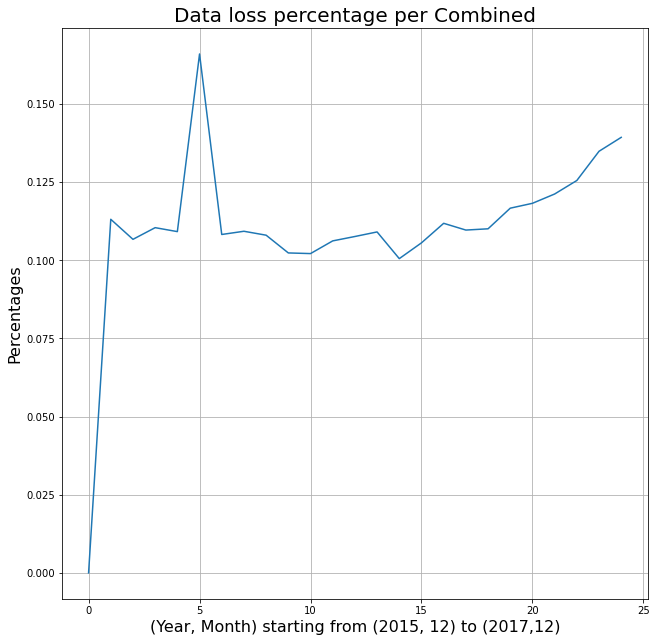

In [179]:
fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
xPos = np.arange(len(userLossDataByMonthCombined))
plt.plot(xPos, userLossDataByMonthCombined['recordsLostPercentage'].to_numpy())
plt.title(f'Data loss percentage per Combined', fontsize = 20)

plt.xlabel('(Year, Month) starting from (2015, 12) to (2017,12)', fontsize = 16)
plt.ylabel('Percentages', fontsize = 16)
plt.grid()
plt.show()

From the above plot, there was a massive spike at (2016,4). The rapid increase from (2015,12) to the next is attributed to the fact that there was only one record on (2015, 12) for these 14 countries. Other times, the loss percentage hovers around 10-11%, but recnetly there has been a steady rise for all of these 14 countries from the per country plot.